In [26]:
import numpy as np
from IPython.display import display
%matplotlib inline
import openml
import json
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings('ignore')

# Dataset Loading

Merged dataset has 4683 rows and 40 columns.


,ABD,Alcol % peso,Alcol % vol,Amaro,Apparent Attenuation (%),Attenuazione Reale (RDF) %,Attenuazione vendita apparente %p,Azoto alfa-amminico t.q.,Cellule all'insemenzamento,Colore EBC,...,Quotazione lievito - NBB-B,Raffreddamento STEP 3,Rapporto ER/ABW,Temperatura Fermentazione,Temperatura STEP 1,Temperatura STEP 2,Temperatura STEP 3,Temp. lievito all'insemenzamento,Tempo di riduzione diacetile,Brand
0,NaN,5.71,7.31,NaN,NaN,62.35,79.88,NaN,15.1,NaN,...,1.0,NaN,0.92,NaN,10.0,NaN,13.0,2.0,NaN,Red
1,NaN,5.31,6.78,NaN,NaN,67.34,83.23,NaN,10.1,NaN,...,NaN,NaN,0.92,13.0,NaN,NaN,NaN,2.5,NaN,Peroni
2,NaN,5.34,6.81,NaN,NaN,68.95,84.17,NaN,16.0,NaN,...,NaN,NaN,0.86,NaN,10.0,NaN,13.0,2.2,NaN,Nastro Azzurro
3,NaN,4.39,5.66,NaN,NaN,63.05,75.84,NaN,13.0,NaN,...,NaN,NaN,1.13,NaN,10.0,NaN,13.0,2.0,NaN,Red
4,NaN,5.30,6.77,NaN,NaN,67.15,81.85,NaN,16.0,NaN,...,NaN,NaN,0.94,12.0,NaN,NaN,NaN,2.0,NaN,Peroni



Columns in the merged dataset:
1. ABD
2. Alcol % peso
3. Alcol % vol
4. Amaro
5. Apparent Attenuation (%)
6. Attenuazione Reale (RDF) %
7. Attenuazione vendita apparente %p
8. Azoto alfa-amminico t.q.
9. Cellule all'insemenzamento
10. Colore EBC
11. Data riempimento
12. Diacetile + precursori (ferm.)
13. Differenza apparente-limite
14. Durata di conservazione lievito in cella
15. Estratto apparente
16. Estratto apparente limite %Pp
17. Estratto reale 
18. Fermentation rate (13.5Â°-5.5Â°)
19. Final attenuation (EVG)
20. Grado primitivo %Pp
21. Hopped Wort
22. Hopped Wort (37Â°C)
23. Hopped Wort Actidione
24. Iso-alfa acidi
25. NBB-A
26. NBB-B
27. Pentandione + precursori
28. pH
29. pH minimo (End of Ferm)
30. Plato chiusura freddo
31. Quotazione lievito - NBB-B
32. Raffreddamento STEP 3
33. Rapporto ER/ABW
34. Temperatura Fermentazione
35. Temperatura STEP 1
36. Temperatura STEP 2
37. Temperatura STEP 3
38. Temp. lievito all'insemenzamento
39. Tempo di riduzione diacetile
40. Brand

Da

,Missing Values,Percentage (%)
Data riempimento,4683,100.000000
Quotazione lievito - NBB-B,4682,99.978646
Temperatura STEP 2,4613,98.505232
Raffreddamento STEP 3,4613,98.505232
Iso-alfa acidi,4588,97.971386
Amaro,4017,85.778347
Azoto alfa-amminico t.q.,3813,81.422165
Colore EBC,3627,77.450352
Final attenuation (EVG),3624,77.386291
Apparent Attenuation (%),3624,77.386291


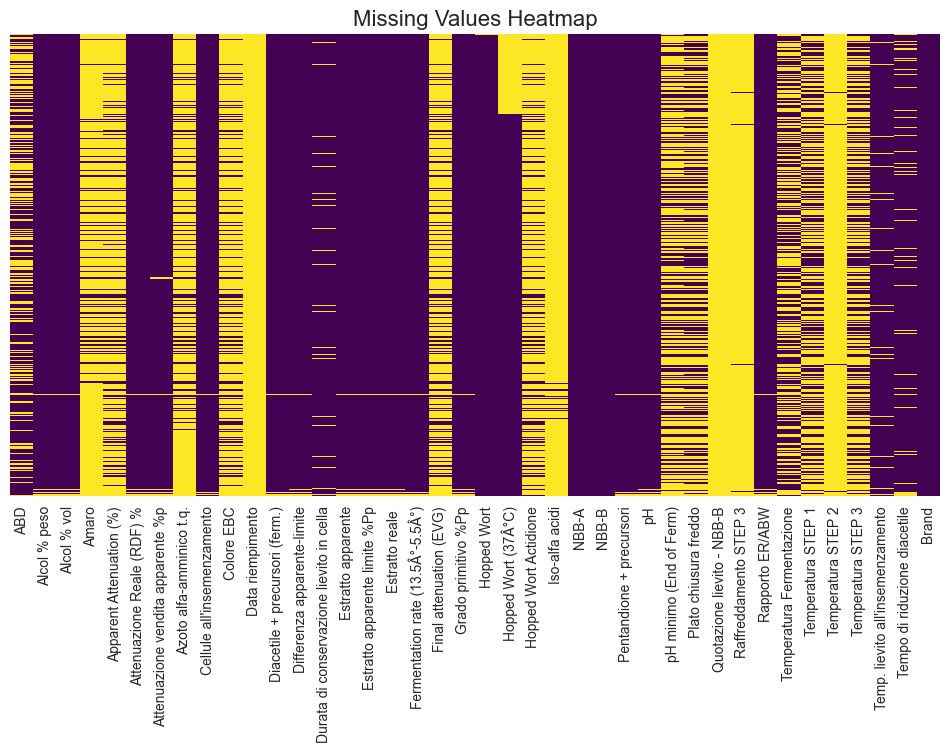

In [27]:
# Load the dataset
df = pd.read_csv('../dataset/beer-fermentation-raw.csv', encoding='latin1')

# Separate numerical and categorical columns
cat_cols = [col for col in ['Brand', 'Stab', 'ST2', 'ST4', 'Data', 'Gruppo parametri']]
num_cols = [col for col in df.columns if col not in cat_cols]

# Aggregation strategy for numerical columns: using mean
num_agg = df.groupby('Sample Code')[num_cols].mean()

# Aggregation strategy for categorical columns: taking the first occurrence
cat_agg = df.groupby('Sample Code')[cat_cols].first()

# Merge the aggregated numerical and categorical data
df_merged = pd.concat([num_agg, cat_agg], axis=1)

# Step to avoid duplicate 'Sample Code' when resetting index
if 'Sample Code' in df_merged.columns:
    df_merged = df_merged.drop(columns=['Sample Code'])

# Reset the index for further analysis (this will add 'Sample Code' as a column)
df_merged.reset_index(inplace=True)
df_merged = df_merged.drop(columns=["Stab", "ST2", "ST4", "Sample Code", "Data", "Gruppo parametri"])

# Display the dimensions of the new merged dataset
print(f"Merged dataset has {df_merged.shape[0]} rows and {df_merged.shape[1]} columns.")
display(df_merged.head())

# Display column names in a clearer format
print("\nColumns in the merged dataset:")
for i, col in enumerate(df_merged.columns, 1):
    print(f"{i}. {col}")

# Display data types of each column in a clearer format
print("\nData types of each column:")
for col, dtype in df_merged.dtypes.items():
    print(f"{col}: {dtype}")

# Check for missing values per column
missing_values = df_merged.isnull().sum()
missing_percentage = (missing_values / len(df_merged)) * 100

# Combine missing values and percentage into a dataframe for better readability
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display columns with missing values
if missing_df['Missing Values'].sum() > 0:
    print("\nMissing Values and Percentage per Column:")
    display(missing_df[missing_df['Missing Values'] > 0])
else:
    print("\nNo missing values detected in the dataset.")

# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_merged.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()


# Cleaning

Dropped columns with more than 50% missing values. Remaining columns: 25


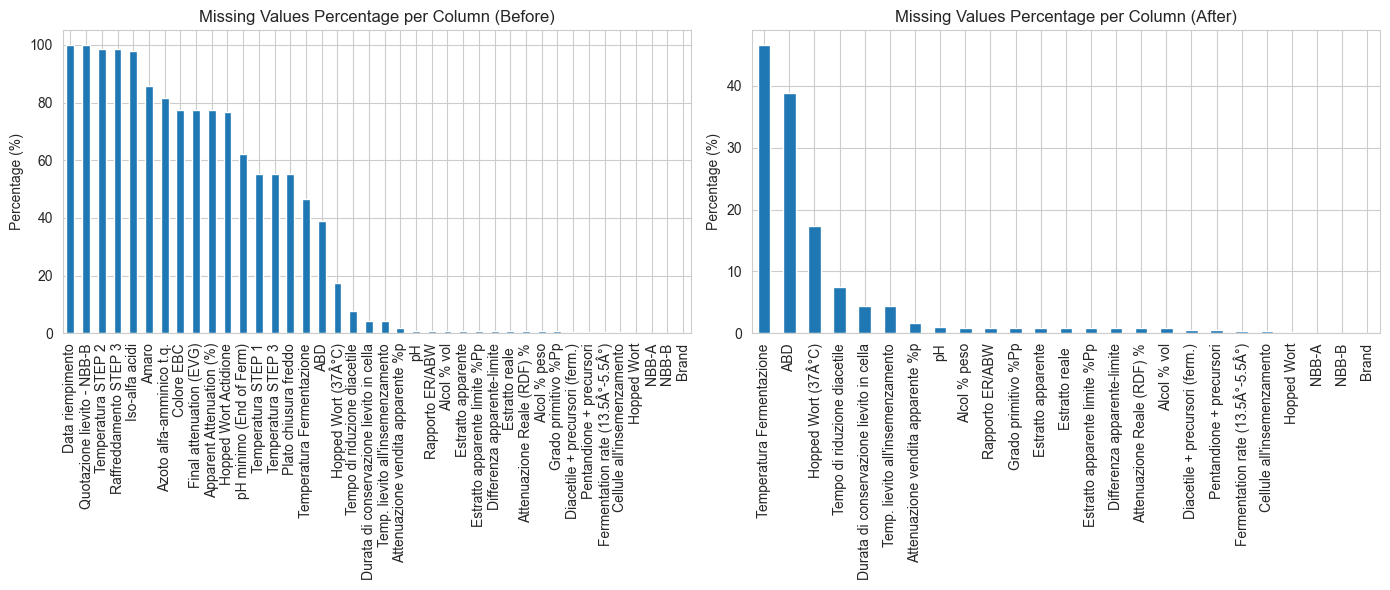

Columns with missing values: ['ABD', 'Alcol % peso', 'Alcol % vol', 'Attenuazione Reale (RDF) %', 'Attenuazione vendita apparente %p', "Cellule all'insemenzamento", 'Diacetile + precursori (ferm.)', 'Differenza apparente-limite', 'Durata di conservazione lievito in cella', 'Estratto apparente', 'Estratto apparente limite %Pp', 'Estratto reale ', 'Fermentation rate (13.5Â°-5.5Â°)', 'Grado primitivo %Pp', 'Hopped Wort', 'Hopped Wort (37Â°C)', 'NBB-A', 'NBB-B', 'Pentandione + precursori', 'pH', 'Rapporto ER/ABW', 'Temperatura Fermentazione', "Temp. lievito all'insemenzamento", 'Tempo di riduzione diacetile']
Imputed missing values in numerical columns with mean.


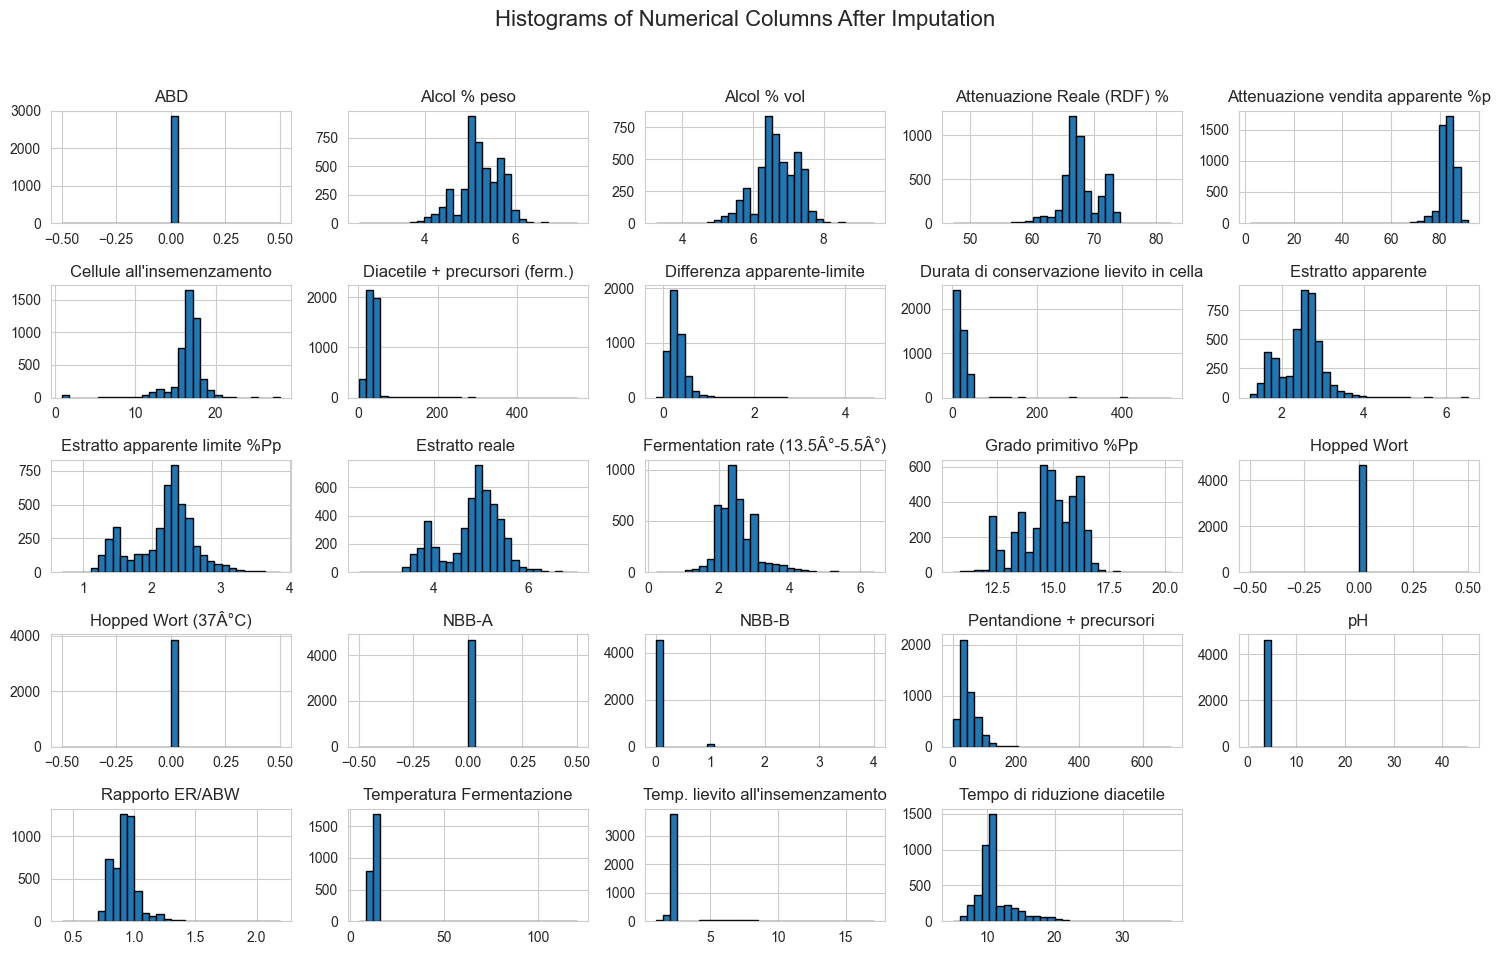

Imputed missing values in categorical columns with mode.


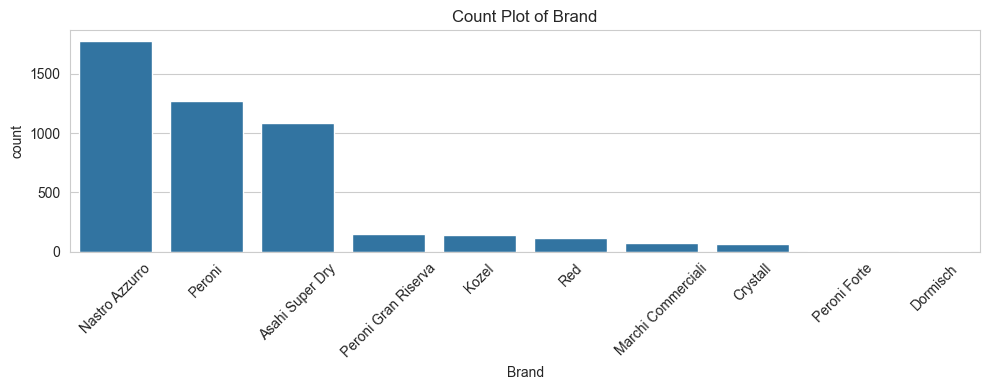

Found 1 duplicate rows. Dropping duplicates...

Statistical summary of numerical columns:
          ABD  Alcol % peso  Alcol % vol  Attenuazione Reale (RDF) %  \
count  4682.0   4682.000000  4682.000000                 4682.000000   
mean      0.0      5.216432     6.659597                   67.745165   
std       0.0      0.465740     0.598805                    2.984948   
min       0.0      2.530000     3.240000                   47.120000   
25%       0.0      4.980000     6.340000                   66.180000   
50%       0.0      5.200000     6.640000                   67.270000   
75%       0.0      5.590000     7.140000                   69.050000   
max       0.0      7.370000     9.430000                   82.380000   

       Attenuazione vendita apparente %p  Cellule all'insemenzamento  \
count                        4682.000000                 4682.000000   
mean                           83.121483                   16.513327   
std                             3.744766     

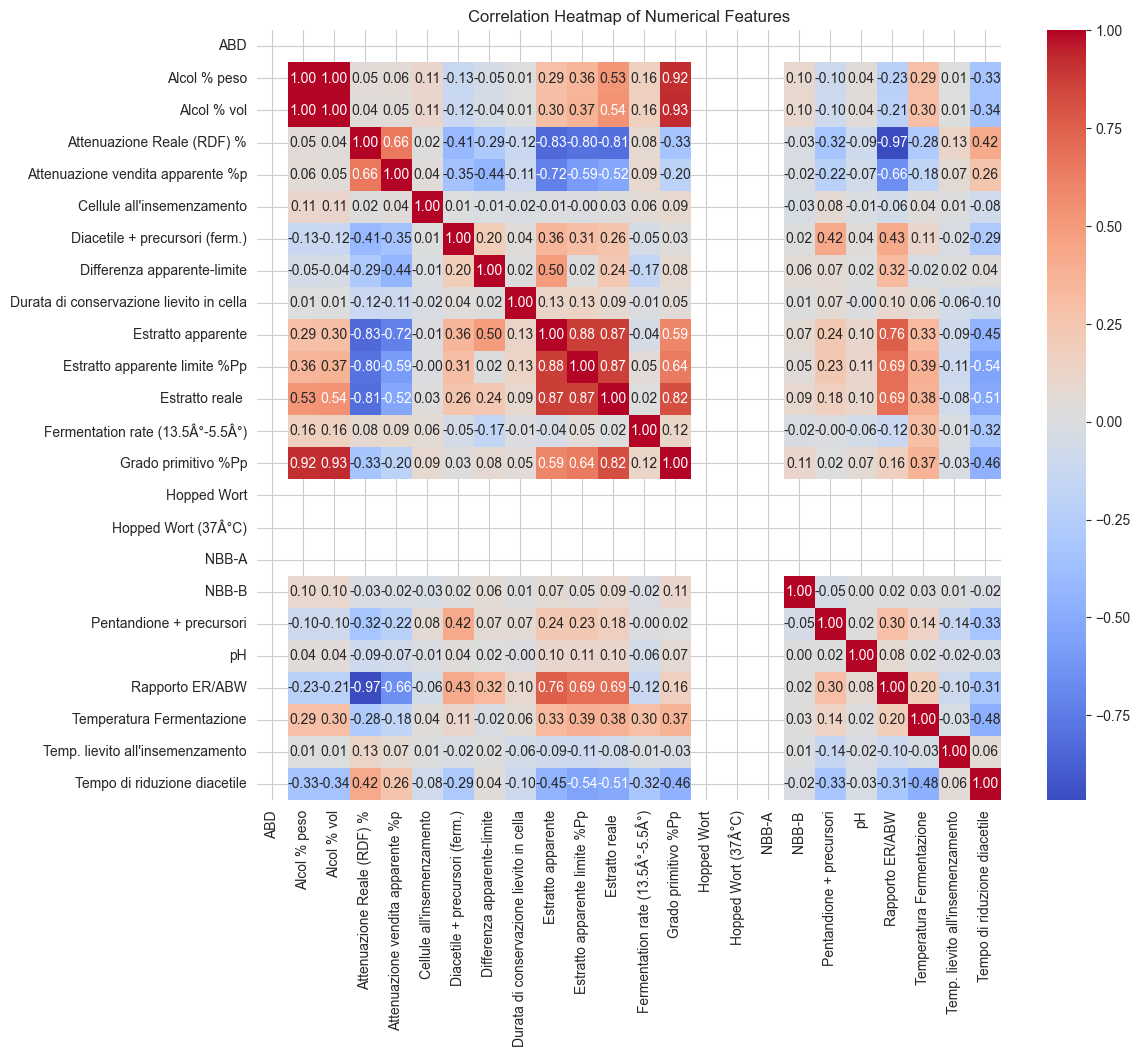


Categorical column summary:

Brand value counts:
Nastro Azzurro         1778
Peroni                 1272
Asahi Super Dry        1085
Peroni Gran Riserva     145
Kozel                   142
Red                     114
Marchi Commerciali       70
Crystall                 66
Peroni Forte              7
Dormisch                  3
Name: Brand, dtype: int64

Final dataset contains 4682 rows and 25 columns.


,ABD,Alcol % peso,Alcol % vol,Attenuazione Reale (RDF) %,Attenuazione vendita apparente %p,Cellule all'insemenzamento,Diacetile + precursori (ferm.),Differenza apparente-limite,Durata di conservazione lievito in cella,Estratto apparente,...,Hopped Wort (37Â°C),NBB-A,NBB-B,Pentandione + precursori,pH,Rapporto ER/ABW,Temperatura Fermentazione,Temp. lievito all'insemenzamento,Tempo di riduzione diacetile,Brand
0,0.0,5.71,7.31,62.35,79.88,15.1,48.0,1.03,22.40,3.23,...,0.0,0.0,0.0,68.0,4.21,0.92,12.807534,2.0,11.219009,Red
1,0.0,5.31,6.78,67.34,83.23,10.1,48.0,0.32,19.00,2.52,...,0.0,0.0,0.0,76.0,4.22,0.92,13.000000,2.5,11.219009,Peroni
2,0.0,5.34,6.81,68.95,84.17,16.0,34.0,0.14,6.00,2.34,...,0.0,0.0,0.0,39.0,4.22,0.86,12.807534,2.2,11.219009,Nastro Azzurro
3,0.0,4.39,5.66,63.05,75.84,13.0,38.0,1.05,44.00,3.25,...,0.0,0.0,0.0,41.0,4.22,1.13,12.807534,2.0,11.219009,Red
4,0.0,5.30,6.77,67.15,81.85,16.0,51.0,0.53,44.25,2.73,...,0.0,0.0,0.0,61.0,4.21,0.94,12.000000,2.0,11.219009,Peroni


In [28]:
# Assume df_merged is your initial DataFrame
df = df_merged

# Step 1: Calculate and apply a threshold for dropping columns with more than 50% missing values
threshold = len(df) * 0.5  # 50% missing values threshold
df_clean = df.dropna(axis=1, thresh=threshold)

print(f"Dropped columns with more than 50% missing values. Remaining columns: {df_clean.shape[1]}")

# **Plot missing values per column before and after dropping columns**
plt.figure(figsize=(14, 6))

# Before dropping columns
plt.subplot(1, 2, 1)
(df.isnull().mean() * 100).sort_values(ascending=False).plot.bar()
plt.title('Missing Values Percentage per Column (Before)')
plt.ylabel('Percentage (%)')

# After dropping columns
plt.subplot(1, 2, 2)
(df_clean.isnull().mean() * 100).sort_values(ascending=False).plot.bar()
plt.title('Missing Values Percentage per Column (After)')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

# Step 2: List columns with remaining missing values
cols_with_missing = df_clean.columns[df_clean.isnull().any()].tolist()
if cols_with_missing:
    print(f"Columns with missing values: {cols_with_missing}")
else:
    print("No columns with missing values.")

# Step 3: Impute missing values
# Handle numerical columns - fill missing values with mean
num_cols = df_clean.select_dtypes(include=['float64', 'int64'])
df_clean[num_cols.columns] = num_cols.fillna(num_cols.mean())
print(f"Imputed missing values in numerical columns with mean.")

# **Plot histograms of numerical columns after imputation**
num_cols.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns After Imputation', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Handle categorical columns - fill missing values with mode (most frequent value)
cat_cols = df_clean.select_dtypes(include=['object'])
for col in cat_cols.columns:
    if df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
print(f"Imputed missing values in categorical columns with mode.")

# **Plot count plots of categorical columns**
for col in cat_cols.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df_clean, order=df_clean[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 4: Convert 'Data' column to datetime with error handling
if 'Data' in df_clean.columns:
    try:
        df_clean['Data'] = pd.to_datetime(df_clean['Data'], format='%d/%m/%Y', errors='coerce')
        print("'Data' column successfully converted to datetime.")

        # **Plot time series for numerical columns**
        num_cols_with_data = [col for col in num_cols.columns if col in df_clean.columns]
        for col in num_cols_with_data:
            plt.figure(figsize=(12, 6))
            sns.lineplot(x='Data', y=col, data=df_clean)
            plt.title(f'Time Series of {col}')
            plt.xlabel('Date')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Error converting 'Data' column to datetime: {e}")

# Step 5: Handle duplicate rows
num_duplicates = df_clean.duplicated().sum()
if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate rows. Dropping duplicates...")
    df_clean = df_clean.drop_duplicates()
else:
    print("No duplicate rows found.")

# Step 6: Statistical summary of the dataset
# Summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df_clean.describe())

# **Plot correlation heatmap of numerical columns**
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[num_cols.columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Summary of categorical columns
print("\nCategorical column summary:")
for col in cat_cols.columns:
    print(f"\n{col} value counts:")
    print(df_clean[col].value_counts())

# Optional: Display final dataframe after cleaning
print(f"\nFinal dataset contains {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.")
display(df_clean.head())

# Exploratory Data Analysis

In [29]:
# Step 2: List columns with remaining missing values
cols_with_missing = df_clean.columns[df_clean.isnull().any()].tolist()
if cols_with_missing:
    print(f"\nColumns with missing values: {cols_with_missing}")
else:
    print("\nNo columns with missing values.")

# Step 3: Impute missing values for numerical and categorical columns

# Numerical columns: fill missing values with the mean
num_cols = [col for col in num_cols if col in df_clean.columns]
if len(num_cols) > 0:
    df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())
    print("Imputed missing values in numerical columns with mean.")

# Categorical columns: enhanced handling
cat_cols = [col for col in cat_cols if col in df_clean.columns]
if len(cat_cols) > 0:
    # Convert all categorical columns to string type
    df_clean[cat_cols] = df_clean[cat_cols].astype(str)

    # Strip whitespace and convert to lowercase for consistency
    df_clean[cat_cols] = df_clean[cat_cols].apply(lambda col: col.str.strip().str.lower())

    # Handle missing values
    # Option 1: Fill missing values with a placeholder
    df_clean[cat_cols] = df_clean[cat_cols].replace({'nan': np.nan})  # Convert 'nan' strings to np.nan
    df_clean[cat_cols] = df_clean[cat_cols].fillna('missing')

    # Optionally, reduce cardinality by grouping rare categories into 'other'
    # Set a threshold for minimum frequency (e.g., categories less than 1% of total)
    for col in cat_cols:
        freq = df_clean[col].value_counts(normalize=True)
        rare_categories = freq[freq < 0.01].index
        df_clean[col] = df_clean[col].replace(rare_categories, 'other')

    print("Processed categorical columns with consistent formatting and imputed missing values.")

# Step 4: Convert 'Data' column to datetime format (with error handling)
if 'Data' in df_clean.columns:
    try:
        df_clean['Data'] = pd.to_datetime(df_clean['Data'], format='%d/%m/%Y', errors='coerce')
        print("'Data' column successfully converted to datetime.")
    except Exception as e:
        print(f"Error converting 'Data' column to datetime: {e}")

# Step 5: Handle duplicate rows
num_duplicates = df_clean.duplicated().sum()
if num_duplicates > 0:
    print(f"\nFound {num_duplicates} duplicate rows. Dropping duplicates...")
    df_clean = df_clean.drop_duplicates()
else:
    print("\nNo duplicate rows found.")

# Step 6: Statistical summary of the dataset

# Summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df_clean[num_cols].describe())

# Optional: Summary of categorical columns
print("\nCategorical column summary:")
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Unique categories: {df_clean[col].nunique()}")
    print(f"Value counts:")
    print(df_clean[col].value_counts())

# Final summary: Display cleaned dataset
print(f"\nFinal dataset contains {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.")
display(df_clean.head())

# Final step: Save clean dataset
print("Saving clean dataset to CSV...")
df_clean.to_csv("../beer-fermentation.csv")
print("Dataset saved!")


No columns with missing values.
Imputed missing values in numerical columns with mean.
Processed categorical columns with consistent formatting and imputed missing values.

No duplicate rows found.

Statistical summary of numerical columns:
          ABD  Alcol % peso  Alcol % vol  Attenuazione Reale (RDF) %  \
count  4682.0   4682.000000  4682.000000                 4682.000000   
mean      0.0      5.216432     6.659597                   67.745165   
std       0.0      0.465740     0.598805                    2.984948   
min       0.0      2.530000     3.240000                   47.120000   
25%       0.0      4.980000     6.340000                   66.180000   
50%       0.0      5.200000     6.640000                   67.270000   
75%       0.0      5.590000     7.140000                   69.050000   
max       0.0      7.370000     9.430000                   82.380000   

       Attenuazione vendita apparente %p  Cellule all'insemenzamento  \
count                        4682.000

,ABD,Alcol % peso,Alcol % vol,Attenuazione Reale (RDF) %,Attenuazione vendita apparente %p,Cellule all'insemenzamento,Diacetile + precursori (ferm.),Differenza apparente-limite,Durata di conservazione lievito in cella,Estratto apparente,...,Hopped Wort (37Â°C),NBB-A,NBB-B,Pentandione + precursori,pH,Rapporto ER/ABW,Temperatura Fermentazione,Temp. lievito all'insemenzamento,Tempo di riduzione diacetile,Brand
0,0.0,5.71,7.31,62.35,79.88,15.1,48.0,1.03,22.40,3.23,...,0.0,0.0,0.0,68.0,4.21,0.92,12.807534,2.0,11.219009,red
1,0.0,5.31,6.78,67.34,83.23,10.1,48.0,0.32,19.00,2.52,...,0.0,0.0,0.0,76.0,4.22,0.92,13.000000,2.5,11.219009,peroni
2,0.0,5.34,6.81,68.95,84.17,16.0,34.0,0.14,6.00,2.34,...,0.0,0.0,0.0,39.0,4.22,0.86,12.807534,2.2,11.219009,nastro azzurro
3,0.0,4.39,5.66,63.05,75.84,13.0,38.0,1.05,44.00,3.25,...,0.0,0.0,0.0,41.0,4.22,1.13,12.807534,2.0,11.219009,red
4,0.0,5.30,6.77,67.15,81.85,16.0,51.0,0.53,44.25,2.73,...,0.0,0.0,0.0,61.0,4.21,0.94,12.000000,2.0,11.219009,peroni


Saving clean dataset to CSV...
Dataset saved!


# Benchmark

In [30]:
def create_dataset_config(suite_id, output_file):
    """
    Creates a JSON configuration for datasets in an OpenML suite.
    
    :param suite_id: int, The OpenML suite ID to load datasets from.
    :param output_file: str, The file path to save the configuration JSON.
    """
    config = {}

    # Fetch the benchmark suite
    benchmark_suite = openml.study.get_suite(suite_id)

    for task_id in benchmark_suite.tasks:  # Iterate over tasks in the suite
        task = openml.tasks.get_task(task_id)  # Get the OpenML task
        dataset = task.get_dataset()  # Get the dataset

        print(dataset.name)

        # Retrieve data and metadata
        X, y, categorical_indicator, attribute_names = dataset.get_data(
            dataset_format="dataframe", target=dataset.default_target_attribute
        )

        # Extract categorical columns and calculate cardinality
        cat_cols = [name for name, is_cat in zip(attribute_names, categorical_indicator) if is_cat]
        cat_cards = [2 for _ in cat_cols]

        # Get the number of numerical features
        n_num_features = sum(not is_cat for is_cat in categorical_indicator)

        # Add the dataset info to the configuration
        config[dataset.name] = {
            "n_num_features": n_num_features,
            "cat_cols": cat_cols,
            "cat_cards": cat_cards,
            "target": dataset.default_target_attribute
        }

    # Save the configuration to a JSON file
    with open(output_file, "w") as f:
        json.dump(config, f, indent=2)

    print(f"Configuration saved to {output_file}")


# Usage example
create_dataset_config(suite_id=337, output_file="num_clf_config.json")


credit
electricity
covertype
pol
house_16H
MagicTelescope
bank-marketing
MiniBooNE
Higgs
eye_movements
Diabetes130US
jannis
default-of-credit-card-clients
Bioresponse
california
heloc
Configuration saved to num_clf_config.json
